<a href="https://colab.research.google.com/github/Nguthirukar/Nguthirukar/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot  as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from collections import Counter

In [11]:
iris = datasets.load_iris()
iris_df = pd.DataFrame( data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])

In [12]:
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [13]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size =0.2, shuffle = True, random_state= 0)

In [16]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(f"training set size: {X_train.shape[0]} sample\ntest set size: {X_test.shape[0]} samples")

training set size: 120 sample
test set size: 30 samples


In [19]:
Scaler = Normalizer().fit(X_train)
normalized_X_train = Scaler.transform(X_train)
normalized_X_test = Scaler.transform(X_test)


Text(0.5, 1.08, 'pair plot of ds before normalized')

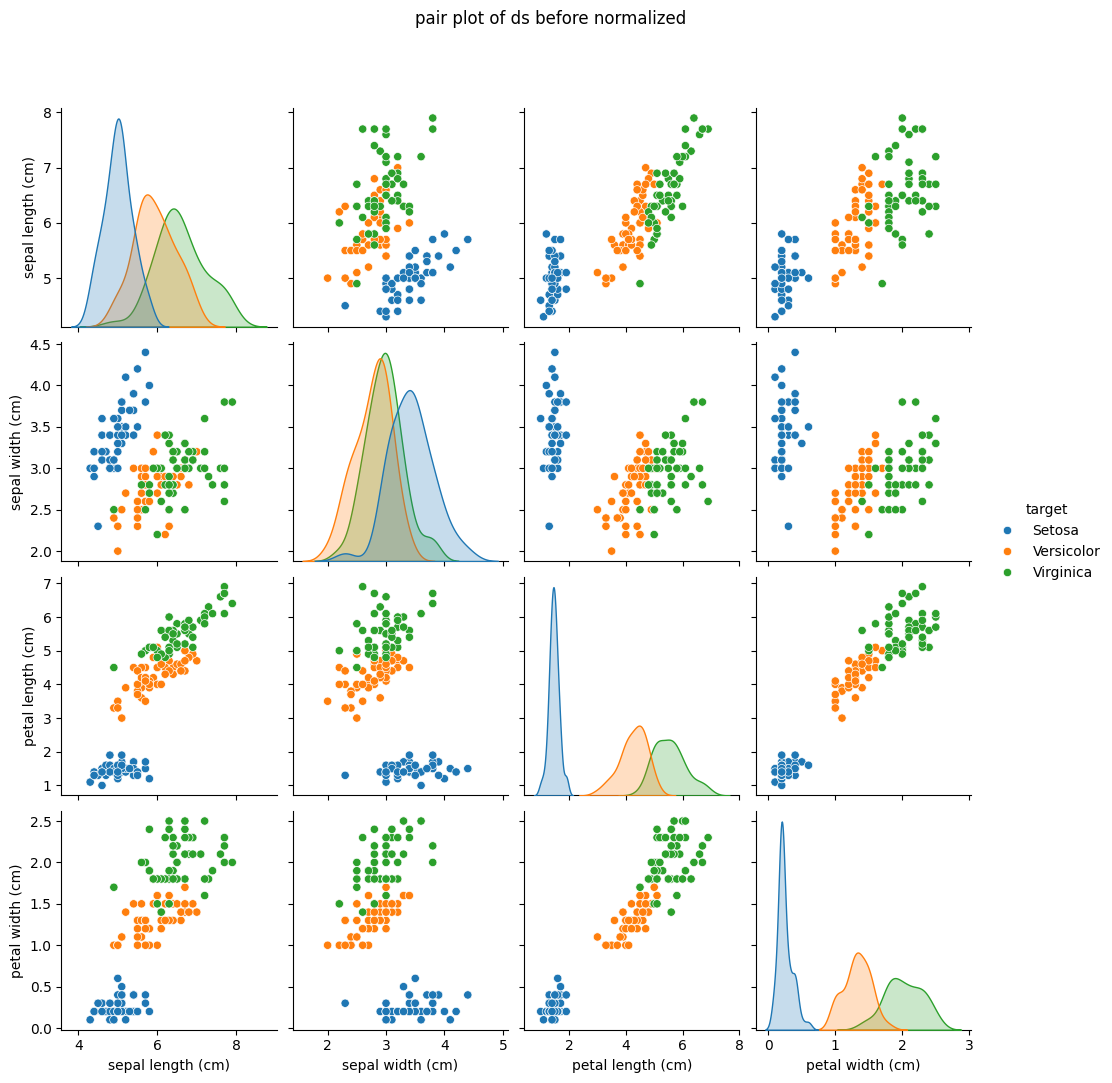

In [18]:
di = {0.0 : "Setosa", 1.0 : "Versicolor", 2.0 : "Virginica"}

before = sns.pairplot(iris_df.replace({'target': di}), hue = 'target')
before.fig.suptitle("pair plot of ds before normalized", y = 1.08)


In [21]:
iris_df_2 = pd.DataFrame( data = np.c_[normalized_X_train, y_train],
                         columns = iris['feature_names'] + ['target'])


Text(0.5, 1.08, 'pair plot of ds after normalized')

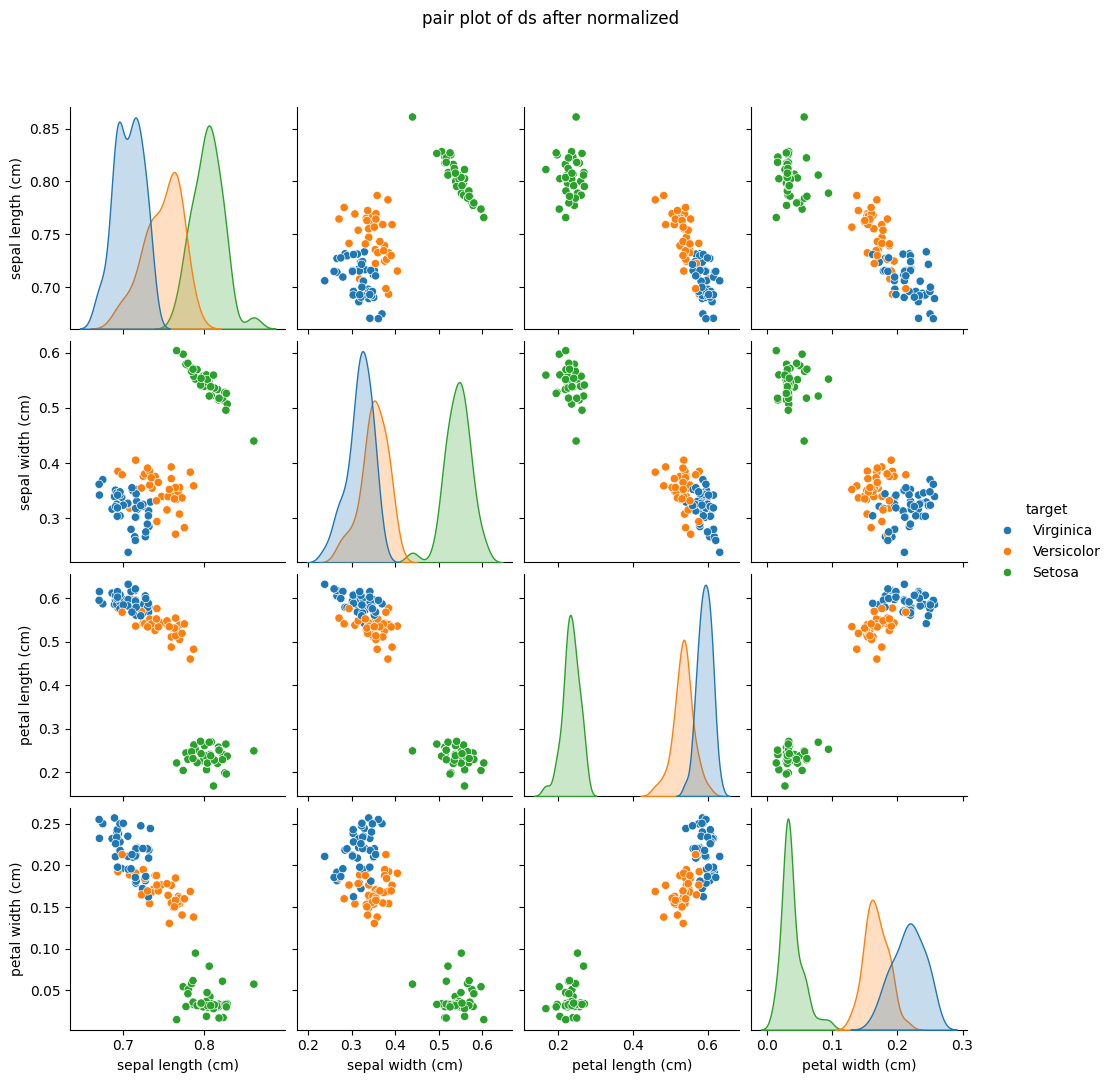

In [22]:
di = {0.0 : "Setosa", 1.0 : "Versicolor", 2.0 : "Virginica"}
after = sns.pairplot(iris_df_2.replace({'target': di}), hue = 'target')
after.fig.suptitle("pair plot of ds after normalized", y = 1.08)

In [35]:
def distance_ecu(X_train, X_test_point):
  distances = []
  for row in range(len(X_train)):
    current_train_point = X_train[row]
    current_distance = 0
  for col in range(len(current_train_point)):
    current_distance += (current_train_point[col] - X_test_point[col])**2
    current_distance = np.sqrt(current_distance)
    distances.append(current_distance)

  distances = pd.DataFrame(data = distances, columns = ['dist'])
  return distances

In [36]:
def nearest_neighbors (distance_point, K):
  df_nearest = distance_point.sort_values(by = ['dist'], axis = 0)
  df_nearest = df_nearest[:K]
  return df_nearest

In [37]:
def voting(df_nearest, y_train):
  counter_vote = Counter(y_train[df_nearest.index])
  y_pred = counter_vote.most_common()[0][0]
  return y_pred

In [38]:
def KNN(X_train, y_train, X_test, K):
  y_pred =[]
  for X_test_point in X_test:
    distance_point = distance_ecu(X_train, X_test_point)
    df_nearest_point = nearest_neighbors(distance_point, K)
    y_pred_point = voting(df_nearest_point, y_train)
    y_pred.append(y_pred_point)
  return y_pred

In [39]:
K=3
y_pred_scratch = KNN(normalized_X_train, y_train, normalized_X_test, K)

print(y_pred_scratch)

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [40]:
print(f"the accuracy of the model is:", {accuracy_score(y_test, y_pred_scratch)})

the accuracy of the model is: {0.2}


In [30]:
knn = KNeighborsClassifier(K)
knn.fit(normalized_X_train, y_train)
y_pred_sklearn = knn.predict(normalized_X_test)

print(y_pred_sklearn)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [33]:
print(f"the accuracy of the model is:", {accuracy_score(y_test, y_pred_sklearn)})

the accuracy of the model is: {0.9666666666666667}


In [41]:
n_splits = 4
kf = KFold(n_splits = n_splits)
accuracy_K = []
K_values = list(range(1,30,2))
for k in K_values:
  accuracy_fold = 0
  for normalized_X_train_fold_idx, normalized_X_valid_fold_idx in kf.split(normalized_X_train):
    normalized_X_train_fold = normalized_X_train[normalized_X_train_fold_idx]
    y_train_fold = y_train[normalized_X_train_fold_idx]
    normalized_X_test_fold = normalized_X_train [normalized_X_valid_fold_idx]

    y_valid_fold = y_train[normalized_X_valid_fold_idx]
    y_pred_fold = KNN(normalized_X_train_fold, y_train_fold, normalized_X_test_fold, K)

    accuracy_fold += accuracy_score(y_pred_fold, y_valid_fold)

accuracy_fold = accuracy_fold/n_splits
accuracy_K.append(accuracy_fold)


In [46]:
print(f"The accuracy for each K value was: {list(zip(accuracy_K, K_values))}")



The accuracy for each K value was: [(0.325, 1)]


In [48]:
print(f"Best_accuracy was {np.max(accuracy_K)}, which corresponds to a value of k = {K_values[np.argmax(accuracy_K)]}")

Best_accuracy was 0.325, which corresponds to a value of k = 1


In [50]:
knn = KNeighborsClassifier(K, algorithm = 'kd_tree')
knn.fit(normalized_X_train, y_train)
y_pred_sklearn = knn.predict(normalized_X_test)

print(f"the accuracy of the model is:", {accuracy_score(y_test, y_pred_sklearn)})

the accuracy of the model is: {0.9666666666666667}
